# Data preparetion process

> Yes, it could be done in less amount of code, but that way it's much easier to read<br>
> Also it could be done line by line or even in Spark, but our datasets small enough to use them in Pandas

1. Get all dirs for files

In [1]:
import os
os.chdir('../Data/WHO Datasets/Unboxed')
cwd = os.getcwd()

In [2]:
# We are having datasets with and without metadata. So let's work only with 'DATA' marked datasets
datalist = []
for dirpath, dirname, filenames in os.walk(cwd):
    for file in filenames:
        if file.endswith("Data.csv"):
            datalist.append(os.path.join(dirpath, file))

2. Check what is in these datasets

In [3]:
with open(datalist[1], mode='r') as f:
    print(f.readline())
    print(f.readline())

Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]

"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,Afghanistan,AFG,50.34,50.44

- Because all datasets are from WHO we are can use that as a reference for all of them
- Some datasets have more than 1 series, so for grouping will be much easier to use Pandas

3. Create a list of countries that you're have in any dataset

In [4]:
import pandas as pd

countries = set()

for dataset in datalist:
    df = pd.read_csv(dataset)
    df.drop(df.loc[df['Series Name'] != df['Series Name'].unique()[0]].index, axis=0, inplace=True)
    countries.update(df['Country Code'].tolist())

len(countries)

275

4. Create a list of countries that you're have in any dataset

In [5]:
country_check = {}
for country in countries:
    country_check[country] = 'Not'

for dataset in datalist:
    df = pd.read_csv(dataset)
    df.drop(df.loc[df['Series Name'] != df['Series Name'].unique()[0]].index, axis=0, inplace=True)
    country_list = df['Country Code'].tolist()

    for country in country_list:
        if country_check[country] != 'Delete':
            country_check[country] = 'Have'
    
    for country in country_check:
        if country_check[country] == 'Not':
            country_check[country] = 'Delete'
        elif country_check[country] == 'Have':
            country_check[country] = 'Not'

countries_filtered = set()

for country in country_check:
    if country_check[country] == 'Not':
        countries_filtered.add(country)

len(countries_filtered)

193

5. Get names of countries with void lines and delete them from our countries_filtered set

In [6]:
country_check = {}
info_cols = ['Series Name','Series Code','Country Name','Country Code']

for country in countries_filtered:
    country_check[country] = True

for dataset in datalist:
    df = pd.read_csv(dataset, na_values='..')
    df.drop(info_cols[0:3], axis=1, inplace=True)
    idx = list(set(df.index) - set(df.drop('Country Code', axis=1).dropna(how='all').index))
    for country in df.iloc[idx]['Country Code'].dropna().to_list():
        country_check[country] = False
    
for country in country_check:
    if country_check[country] == False and country in countries_filtered:
        countries_filtered.remove(country)

len(countries_filtered)

139

6. Choose a period that you're interested in

> Based on the fact that each dataset can cover different periods, let's use smallest timespan in our datasets

In [7]:
period = {}

for dataset in datalist:
    df = pd.read_csv(dataset, na_values='..')
    years = set(df.drop(info_cols, axis=1).dropna(how='all',axis=1).columns)
    print(df['Series Name'][0],'\n', years)

Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age) 
 {'2015 [YR2015]', '2000 [YR2000]', '2010 [YR2010]', '2005 [YR2005]', '2018 [YR2018]'}
Birth rate, crude (per 1,000 people) 
 {'1966 [YR1966]', '1995 [YR1995]', '2001 [YR2001]', '1972 [YR1972]', '1980 [YR1980]', '2020 [YR2020]', '1992 [YR1992]', '1961 [YR1961]', '1997 [YR1997]', '2002 [YR2002]', '1968 [YR1968]', '1965 [YR1965]', '1987 [YR1987]', '2017 [YR2017]', '2000 [YR2000]', '1974 [YR1974]', '2005 [YR2005]', '1982 [YR1982]', '1967 [YR1967]', '1996 [YR1996]', '1976 [YR1976]', '1998 [YR1998]', '2003 [YR2003]', '2015 [YR2015]', '1960 [YR1960]', '1981 [YR1981]', '1993 [YR1993]', '2007 [YR2007]', '2013 [YR2013]', '1975 [YR1975]', '2009 [YR2009]', '2016 [YR2016]', '1984 [YR1984]', '2019 [YR2019]', '1969 [YR1969]', '1973 [YR1973]', '1990 [YR1990]', '1989 [YR1989]', '2014 [YR2014]', '1988 [YR1988]', '2008 [YR2008]', '2011 [YR2011]', '1970 [YR1970]', '1962 [YR1962]', '1986 [YR1986]', '1999 

As we can see - we will have a very bad time with our datasets in some cases. So we should forget about datasets:<br>
`Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene`<br>
`Total alcohol consumption per capita`

In [8]:
del datalist[0]
del datalist[-4]

In [9]:
period = {}
years_min = 0
years_max = 9999

for dataset in datalist:
    df = pd.read_csv(dataset, na_values='..')
    years = set(df.drop(info_cols, axis=1).dropna(how='all',axis=1).columns)
    if int(min(years)[0:4]) > years_min:
        years_min = int(min(years)[0:4])
    if int(max(years)[0:4]) < years_max:
        years_max = int(max(years)[0:4])

print(years_min, years_max)

2000 2019


We will increase that timespan to 20 years. 1999-2019

In [10]:
# Savilg it as a set of columns
df = pd.read_csv(datalist[0], na_values='..')
years_col_list = df.drop(info_cols, axis=1).columns
years_col_list

Index(['1960 [YR1960]', '1961 [YR1961]', '1962 [YR1962]', '1963 [YR1963]',
       '1964 [YR1964]', '1965 [YR1965]', '1966 [YR1966]', '1967 [YR1967]',
       '1968 [YR1968]', '1969 [YR1969]', '1970 [YR1970]', '1971 [YR1971]',
       '1972 [YR1972]', '1973 [YR1973]', '1974 [YR1974]', '1975 [YR1975]',
       '1976 [YR1976]', '1977 [YR1977]', '1978 [YR1978]', '1979 [YR1979]',
       '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]',
       '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]',
       '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]',
       '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]',
       '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '

In [11]:
# We will check first and last position. We'll work with everything inbetween
years_col_list = [
    '2000 [YR2000]', '2019 [YR2019]'
]

In [12]:
years_col_list_full = [
    '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
    '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
    '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
    '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
    '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]'
]

7. Delete all countries that have smaller observation period (SHOuLD BE REWRITTEN)

In [13]:
# For check if country is inside our period
countries_check = {}
for country in countries_filtered:
    countries_check[country] = 'Not'


for dataset in datalist:
    df = pd.read_csv(dataset, na_values='..')
    df_years = df.loc[df['Series Name'][0] == df['Series Name']].drop(info_cols[0:3], axis=1)

    df_years[years_col_list + ['Country Code']]
    
    for country in df_years[years_col_list + ['Country Code']].dropna(how='any')['Country Code']:
        if country in countries_check and countries_check[country] != 'Delete':
          countries_check[country] = 'Have'
    
    for country in countries_check:
        if countries_check[country] == 'Not':
            countries_check[country] = 'Delete'
        elif countries_check[country] == 'Have':
            countries_check[country] = 'Not'

b=[i[1] for i in countries_check.items()]

for k in list(set(b)):
    print("{0}: {1}".format(k, b.count(k)))

Not: 20
Delete: 119


So we will use 20 countries. Let's record list of their country codes in the 

In [14]:
for country in countries_check:
    if countries_check[country] == 'Delete' and country in countries_filtered:
        countries_filtered.remove(country)

len(countries_filtered)

20

8. Check for data gaps in your data and fill them if needed

In [15]:
len(datalist)

11

Datasets should be checked separatelty, one by one, each has it's own specific<br>
Since it will be a lot of datasets, here as functions i will create repeatetive tasks

In [16]:
df.loc[df['Series Name'][0] == df['Series Name']].drop(info_cols[0:3], axis=1)

,Country Code,1996 [YR1996],1998 [YR1998],2000 [YR2000],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,RUS,43.5,36.815922,37.810944,36.318409,32.338310,30.769230,27.403847,22.115385,22.596153,...,19.248827,18.779343,20.689655,20.197044,17.733990,18.719212,18.840580,17.874395,20.289856,19.806763
1,AFG,1.0,0.497512,0.995025,9.452736,14.427860,15.384615,14.903846,17.788462,18.750000,...,14.084507,14.553990,16.256157,18.719212,20.689655,22.167488,20.289856,21.256039,19.806763,7.246377
2,ALB,29.5,38.805969,41.293533,48.258705,50.248756,49.038460,51.442307,49.038460,51.923077,...,50.704224,51.173710,50.246304,52.709358,52.216747,54.187191,52.657005,52.173912,51.207729,50.241547
3,DZA,14.5,12.437811,14.427860,18.905472,18.905472,23.557692,25.480770,22.596153,20.192308,...,22.535212,23.943663,25.123152,24.630543,23.645321,23.152710,21.256039,19.806763,19.323671,20.772947
4,ASM,NaN,NaN,NaN,NaN,NaN,64.423080,70.673080,65.384613,78.365387,...,80.751175,81.220657,NaN,NaN,NaN,NaN,95.169083,92.753624,81.642509,75.845413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,VIR,NaN,NaN,NaN,NaN,NaN,74.038460,85.576920,72.115387,70.673080,...,73.239433,72.300468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,PSE,24.5,28.855721,25.870647,24.378109,24.378109,26.923077,26.923077,33.173077,28.365385,...,20.657276,22.535212,22.660099,21.674877,18.719212,21.674877,22.222221,20.772947,17.391304,19.323671
211,YEM,27.5,26.368158,24.378109,14.925373,23.880596,20.192308,17.307692,16.346153,16.346153,...,9.389671,11.737089,11.822660,7.389163,5.418719,5.911330,3.864734,4.347826,4.347826,3.864734
212,ZMB,38.0,34.825871,35.820896,41.293533,38.805969,34.615383,34.615383,39.423077,39.903847,...,44.131454,44.131454,44.334976,45.812809,36.453201,36.453201,35.265701,36.231884,34.782608,35.265701


In [17]:
# Since it will be a lot of datasets, here as functions i will create a main repeatetive task
def get_yearlist(dataframe, years=[]):

    # For check if all years are in our dataset
    years_col_list_check = {}
    for year in years:
        years_col_list_check[year] = False

    for col in dataframe.columns.drop('Country Code'):
        if col in years:
            years_col_list_check[col] = True

    # That list is needed for the column selection. If we're don't have any, we will get an error
    # I'm sure that there is another way, but this is easier
    temp_year_list = []
    for year in years_col_list_check:
        if years_col_list_check[year] == True:
            temp_year_list.append(year)
        else:
            print("Table doesn't have column {0}".format(year))
    return temp_year_list


def who_dataset_check(dfloc, yearlist=[], countries=[], infcol=[]):
    df = pd.read_csv(dfloc, na_values="..")
    df = df.loc[df['Country Code'].isin(countries)]
    print('>', df['Series Name'].reset_index(drop=True)[0])

    # We will assume based on the data collection process that if table has more than 1 series, then gaps in them are positioned in the same places
    # It is based on the fact that each table is from the same research process. Different series is only separation by gender or class
    df_years = df.loc[df['Series Name'].reset_index(drop=True)[0] == df['Series Name']].drop(info_cols[0:3], axis=1)

    temp_year_list = get_yearlist(df_years, years=yearlist)

    #This is check if our dataset even has a null values
    na_all_check = False

    for country in df_years['Country Code']:
        row_check = False
        na_col_list = []
        for col in temp_year_list:
            row_check = df_years.loc[df['Country Code'] == country][col].isna().bool() or row_check
            if df_years.loc[df['Country Code'] == country][col].isna().bool() == True:
                na_col_list.append(col)
        if row_check == True:
            print('Country {0} has an null values in the next columns: {1}'.format(country, na_col_list))
            na_all_check = True

    # If row_check never triggered
    if na_all_check == False:
        print('Countries have no NaN values except missing columns')

    print()
    return None

In [18]:
for i in range(len(datalist)):
    print('Dataset', i)
    who_dataset_check(datalist[i], yearlist=years_col_list_full, countries=countries_filtered, infcol=info_cols)

Dataset 0
> Birth rate, crude (per 1,000 people)
Countries have no NaN values except missing columns

Dataset 1
> Control of Corruption: Percentile Rank
Table doesn't have column 2001 [YR2001]
Countries have no NaN values except missing columns

Dataset 2
> Death rate, crude (per 1,000 people)
Countries have no NaN values except missing columns

Dataset 3
> Domestic general government health expenditure per capita (current US$)
Countries have no NaN values except missing columns

Dataset 4
> GDP per capita (current US$)
Countries have no NaN values except missing columns

Dataset 5
> Income share held by highest 10%
Country ARG has an null values in the next columns: ['2015 [YR2015]']
Country AUT has an null values in the next columns: ['2001 [YR2001]', '2002 [YR2002]']
Country BEL has an null values in the next columns: ['2001 [YR2001]', '2002 [YR2002]']
Country COL has an null values in the next columns: ['2006 [YR2006]', '2007 [YR2007]']
Country DNK has an null values in the next co

Problems are in Datasets: `[1, 5, 8, 10]`<br>
Each of them needs research so let's do exactly that

In [26]:
df = pd.read_csv(datalist[1], na_values='..')
df = df.loc[(df['Series Name'].reset_index(drop=True)[0] == df['Series Name']) & (df['Country Code'].isin(countries_filtered))].drop(info_cols[0:3], axis=1)
df = df[['Country Code'] + get_yearlist(df, years=years_col_list_full)].set_index('Country Code')
df

Table doesn't have column 2001 [YR2001]


,2000 [YR2000],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
Country Code,,,,,,,,,,,,,,,,,,,
RUS,20.212767,20.634920,25.396826,23.645321,21.463415,19.024391,16.504854,12.135922,11.004785,13.333333,15.639811,15.165876,15.639811,17.307692,15.865385,21.634615,17.307692,20.192308,24.038462
ARG,52.127659,41.798943,40.211639,39.901478,43.414635,43.414635,44.174759,39.805824,40.191387,44.761906,43.601894,40.284359,40.758293,35.576923,34.134617,47.115383,45.673077,55.288460,54.326923
AUT,92.553192,93.650795,94.708992,97.044334,95.121948,94.634148,96.116508,93.689323,92.822968,91.904762,89.573463,89.573463,90.521324,90.865387,90.865387,91.346153,90.865387,91.346153,90.865387
BLR,38.829788,33.862434,37.566139,25.615763,26.829268,36.585365,34.466019,34.466019,33.971291,30.952381,31.753555,39.810425,42.180096,51.442307,48.076923,50.480770,48.557693,52.403847,57.692307
BEL,90.425529,89.947090,89.417992,90.147781,90.243904,88.780487,90.291260,90.776695,90.909088,90.000000,90.521324,91.469193,90.995262,91.346153,91.346153,92.307693,89.903847,89.903847,89.903847
COL,42.553192,46.560848,50.793652,52.216747,52.195122,52.195122,49.029125,49.514565,45.454544,41.428570,47.393364,42.180096,40.284359,42.788460,46.634617,43.269230,43.750000,44.711540,47.596153
CRI,74.468086,70.370369,72.486771,63.054188,65.365852,70.243904,71.844658,71.844658,73.205742,72.857140,72.037918,72.037918,70.616112,75.000000,75.000000,75.000000,66.346153,68.750000,72.596153
DNK,99.468086,99.470901,99.470901,99.507393,99.024391,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,98.557693,99.519234,99.038460,99.519234,99.519234
DOM,32.446808,39.682541,28.571428,32.019703,28.292683,27.804878,24.271845,26.699030,22.009569,20.952381,21.327015,19.431280,20.379147,22.596153,20.673077,23.076923,23.557692,22.596153,23.557692


We want to see how values are changing, so let's create a plot

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

C:\Users\baakh\AppData\Local\Temp\ipykernel_23564\989620846.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.lineplot(data=df.transpose()).set_xticklabels([year[0:4] for year in df.columns.to_list()])


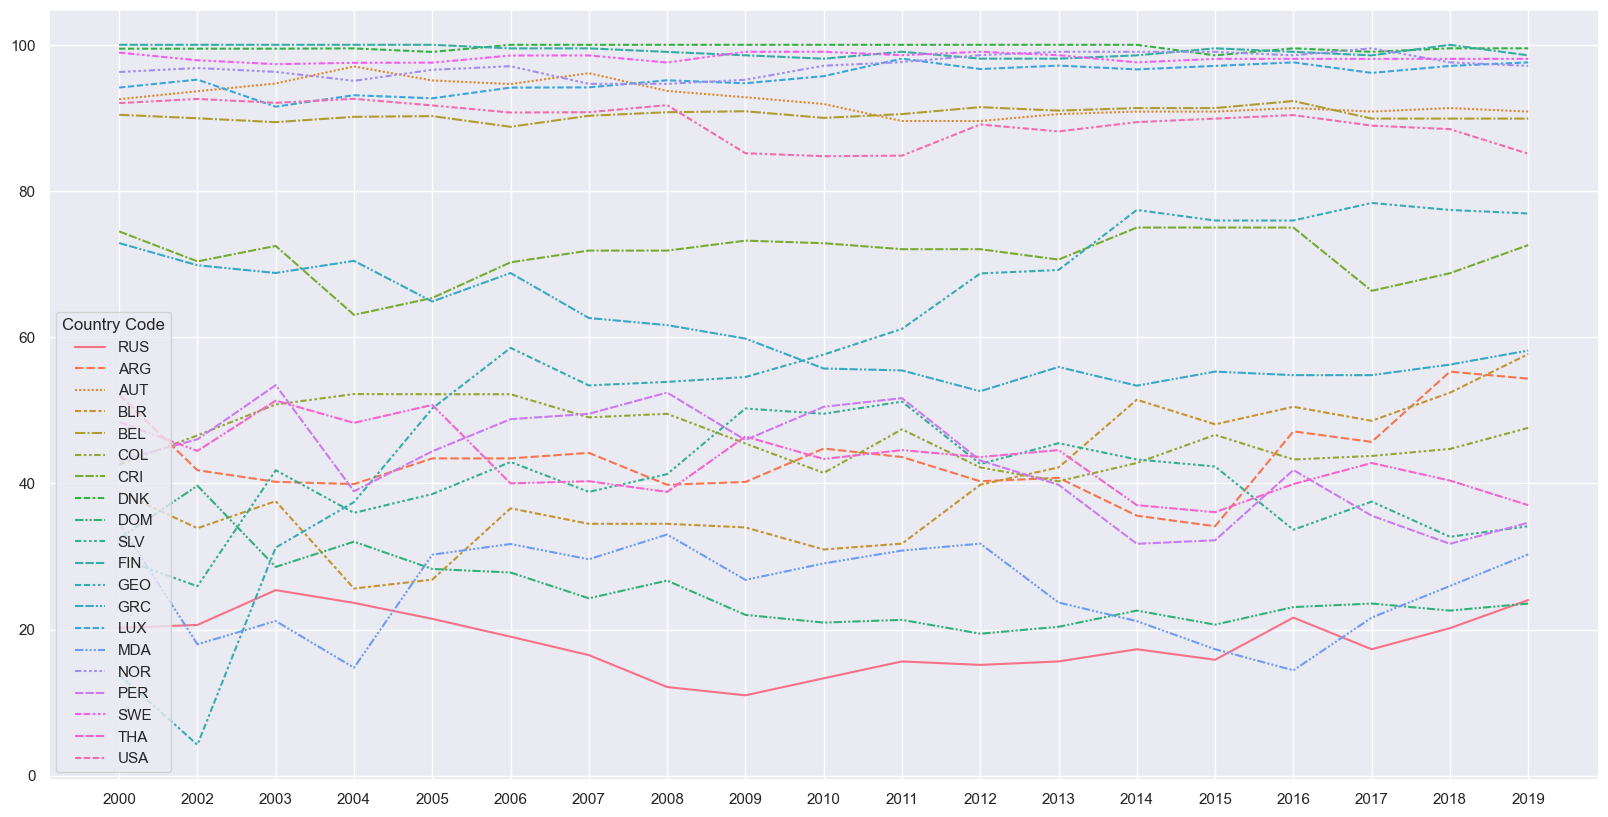

In [29]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df.transpose()).set_xticklabels([year[0:4] for year in df.columns.to_list()])
plt.show()

Welp, since there's only 1 year, i think we can just fill that value in

In [52]:
df = pd.read_csv(datalist[5], na_values='..')
df = df.loc[(df['Series Name'].reset_index(drop=True)[0] == df['Series Name']) & (df['Country Code'].isin(countries_filtered))].drop(info_cols[0:3], axis=1)
df = df[['Country Code'] + get_yearlist(df, years=years_col_list_full)].set_index('Country Code')
df

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
Country Code,,,,,,,,,,,,,,,,,,,,
ARG,37.7,39.5,40.5,37.7,35.2,34.9,33.7,33.7,32.4,31.2,31.7,31.0,29.7,29.4,29.9,NaN,30.4,29.7,29.8,31.0
AUT,22.7,NaN,NaN,23.5,23.8,22.8,23.7,23.8,24.1,24.7,23.6,23.7,23.4,24.3,24.1,23.8,23.8,23.0,23.9,23.2
BLR,24.0,24.0,24.0,22.6,21.4,21.8,22.4,23.6,22.3,22.6,22.9,21.9,21.8,22.1,22.6,21.2,21.3,21.3,21.4,21.3
BEL,28.3,NaN,NaN,22.2,25.1,23.9,22.4,23.5,22.7,22.7,22.7,22.4,21.9,21.8,22.4,22.2,22.2,21.9,22.2,22.3
COL,47.0,46.3,45.2,42.8,44.5,43.2,NaN,NaN,43.7,42.9,43.4,42.4,41.3,41.4,41.4,39.9,39.8,39.0,39.7,40.3
CRI,35.7,39.7,40.4,37.0,36.6,35.9,38.3,38.9,37.7,39.4,36.8,36.9,36.6,37.0,36.9,36.8,37.3,37.0,36.3,36.7
DNK,20.1,NaN,NaN,21.4,20.7,21.0,21.8,22.1,21.0,21.8,22.5,22.7,23.1,23.7,23.6,23.8,23.7,24.0,23.5,23.5
DOM,40.2,39.2,38.3,41.7,41.7,39.0,41.2,38.6,37.8,38.7,36.5,37.5,36.0,37.9,33.4,34.9,35.4,33.5,35.2,33.1
SLV,39.0,38.6,38.8,37.3,35.6,36.8,35.6,35.7,36.1,36.0,33.2,32.8,32.6,34.2,32.2,31.8,30.7,29.1,29.4,29.8


In [53]:
# We will look only on countries that has NaN values
df = df.loc[df.isna().any(axis=1)]

C:\Users\baakh\AppData\Local\Temp\ipykernel_23564\55068996.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.lineplot(data=df.transpose()).set_xticklabels([year[0:4] for year in df.columns.to_list()])


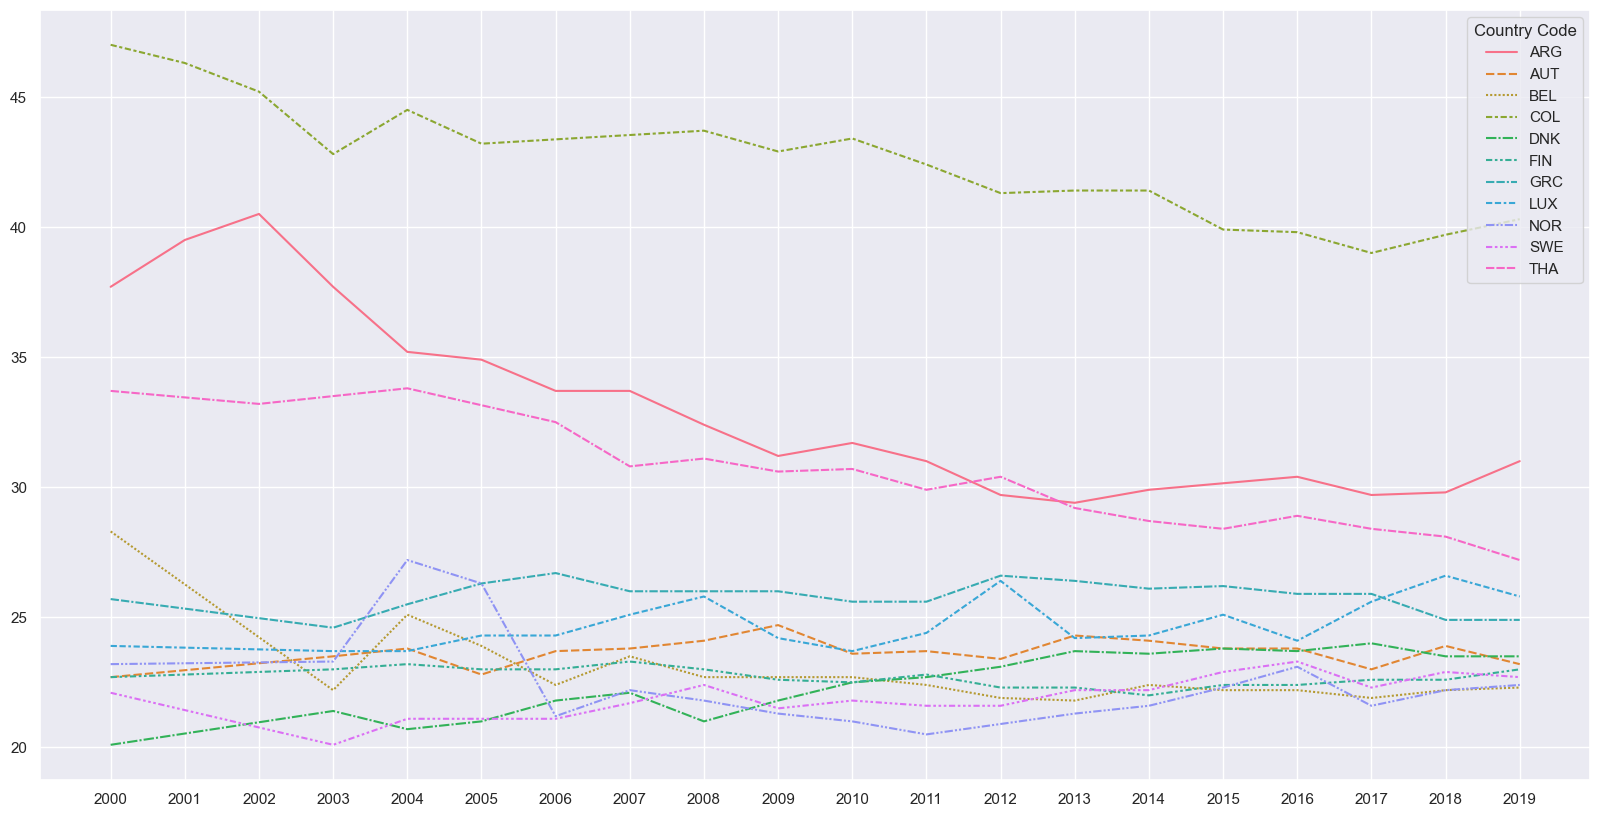

In [54]:
# We will look only on countries that has NaN values
plt.figure(figsize=(20, 10))
sns.lineplot(data=df.transpose()).set_xticklabels([year[0:4] for year in df.columns.to_list()])
plt.show()

Since we have pairs of NaN values we will have to fill this with a approximate trend value

In [39]:
df = pd.read_csv(datalist[8], na_values='..')
df = df.loc[(df['Series Name'].reset_index(drop=True)[0] == df['Series Name']) & (df['Country Code'].isin(countries_filtered))].drop(info_cols[0:3], axis=1)
df = df[['Country Code'] + get_yearlist(df, years=years_col_list_full)].set_index('Country Code')
df

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
Country Code,,,,,,,,,,,,,,,,,,,,
ARG,23.422256,22.840272,19.678291,16.228057,16.555761,17.450565,19.433827,26.402050,24.021954,28.977074,28.306985,30.349783,31.222340,31.752318,29.237684,31.140698,32.322078,35.071580,34.362341,29.992523
AUT,33.410208,32.015872,32.304523,32.667318,32.719662,32.224905,32.313539,31.689224,31.522198,32.388442,32.428959,32.302866,32.116693,32.381106,32.556483,32.197772,33.070793,33.557867,33.659026,33.736405
BLR,35.451450,38.104031,40.882878,36.120512,34.147369,33.420760,31.538019,30.286773,28.718539,32.608056,37.239302,33.403809,34.859520,39.607342,39.061426,34.639467,33.234224,31.574942,31.126387,33.386447
BEL,33.422550,33.799632,35.134645,35.509238,34.686560,34.181892,34.293341,34.920575,35.043686,37.252196,35.832676,35.559696,35.073430,34.874752,34.647457,36.145219,36.440687,35.818101,34.795704,36.278222
COL,7.625457,NaN,NaN,11.035378,NaN,NaN,NaN,NaN,17.039944,13.566534,12.458298,18.001832,20.075045,12.982348,15.910806,16.392132,18.213743,7.278199,13.013726,12.203367
CRI,33.362783,33.181814,33.280067,32.335064,31.895507,31.850472,30.514489,29.979645,30.773757,33.565470,35.386139,35.661121,35.577875,35.545693,36.048699,34.518704,34.571879,36.004048,33.852895,33.779847
DNK,5.473184,5.418639,4.072220,4.049062,3.714274,3.408188,3.311073,2.970495,2.923098,3.047038,3.045790,3.017077,2.726492,2.432184,2.224725,2.330549,2.272655,2.148754,2.121462,1.959882
DOM,4.877501,4.397437,4.238346,3.003074,0.654009,0.741261,1.329069,1.227101,1.757366,2.575415,3.039871,1.684380,1.580060,1.498850,1.954636,2.032918,1.861528,1.551869,1.498400,1.383249
SLV,12.430882,12.986063,14.778496,14.899689,14.365350,12.931191,10.918337,9.909499,9.902777,12.447788,11.641733,10.206161,11.164624,11.003376,11.267282,11.568321,11.230689,10.562171,9.677029,11.192812


That's weird. Geo has a 0 values. We could count that as a NaN values

C:\Users\baakh\AppData\Local\Temp\ipykernel_23564\989620846.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.lineplot(data=df.transpose()).set_xticklabels([year[0:4] for year in df.columns.to_list()])


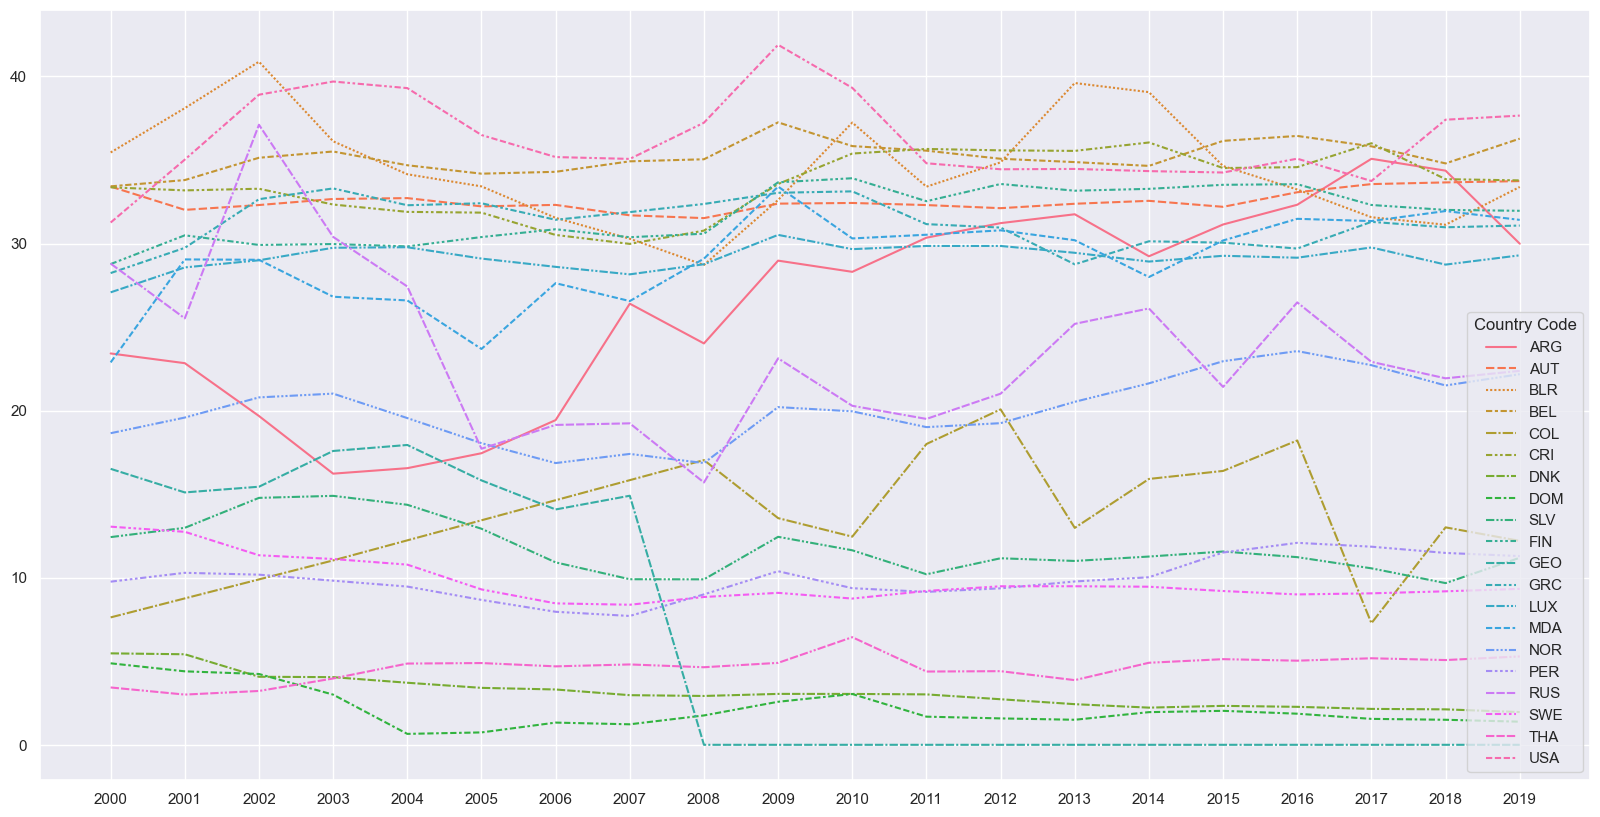

In [40]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df.transpose()).set_xticklabels([year[0:4] for year in df.columns.to_list()])
plt.show()

Yep, that 0 values are an absolute anomaly. Changes here are quite significant, so we have to use only 18 countries. We will not use COL or GEO

In [55]:
df = pd.read_csv(datalist[10], na_values='..')
df = df.loc[(df['Series Name'].reset_index(drop=True)[0] == df['Series Name']) & (df['Country Code'].isin(countries_filtered))].drop(info_cols[0:3], axis=1)
df = df[['Country Code'] + get_yearlist(df, years=years_col_list_full)].set_index('Country Code')
df

Table doesn't have column 2001 [YR2001]


,2000 [YR2000],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
Country Code,,,,,,,,,,,,,,,,,,,
RUS,37.810944,36.318409,32.338310,30.769230,27.403847,22.115385,22.596153,22.596153,23.222750,23.696682,24.413145,19.248827,18.779343,20.689655,20.197044,17.733990,18.719212,18.840580,17.874395
ARG,61.194031,56.218906,61.194031,59.615383,59.134617,58.173077,58.653847,58.173077,56.398106,58.293839,58.215961,57.276997,56.807510,59.113300,60.098522,63.546799,64.532021,65.217392,65.217392
AUT,90.049751,91.542290,91.542290,92.788460,90.384613,93.750000,94.711540,94.230766,94.786728,95.260666,94.835678,95.305161,95.774651,94.581284,94.088669,93.596062,95.073891,94.202896,95.169083
BLR,11.940298,8.457711,8.955224,5.769231,3.365385,5.288462,6.250000,6.730769,7.109005,7.109005,5.164319,6.103286,5.633803,7.881773,8.374384,12.807881,12.315271,12.077294,11.111111
BEL,92.537315,93.034828,95.522385,90.865387,91.346153,92.788460,93.750000,92.788460,93.364929,94.312798,92.957748,92.957748,92.957748,94.088669,94.581284,95.566505,93.103447,92.270531,94.202896
COL,34.825871,37.810944,36.318409,38.942307,38.461540,40.865383,42.307693,42.788460,42.654030,42.654030,46.948357,46.009388,45.539906,47.783253,47.783253,49.753696,49.261086,52.173912,53.623188
CRI,82.587067,83.582092,76.616913,80.769234,72.596153,75.480766,75.000000,76.923080,77.725121,80.568718,81.220657,83.568077,83.098595,85.221672,86.206894,84.729065,84.729065,83.574883,83.574883
DNK,97.512436,99.004974,99.502487,100.000000,100.000000,100.000000,97.115387,99.038460,97.630333,97.630333,97.183098,99.061035,99.530518,97.044334,97.536949,99.014778,97.044334,97.584541,98.550728
DOM,56.218906,55.223881,48.258705,50.961540,48.557693,53.846153,54.326923,52.884617,51.658768,51.184834,52.582161,55.399059,53.990612,54.187191,52.216747,52.709358,52.709358,50.241547,53.140095


C:\Users\baakh\AppData\Local\Temp\ipykernel_23564\989620846.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.lineplot(data=df.transpose()).set_xticklabels([year[0:4] for year in df.columns.to_list()])


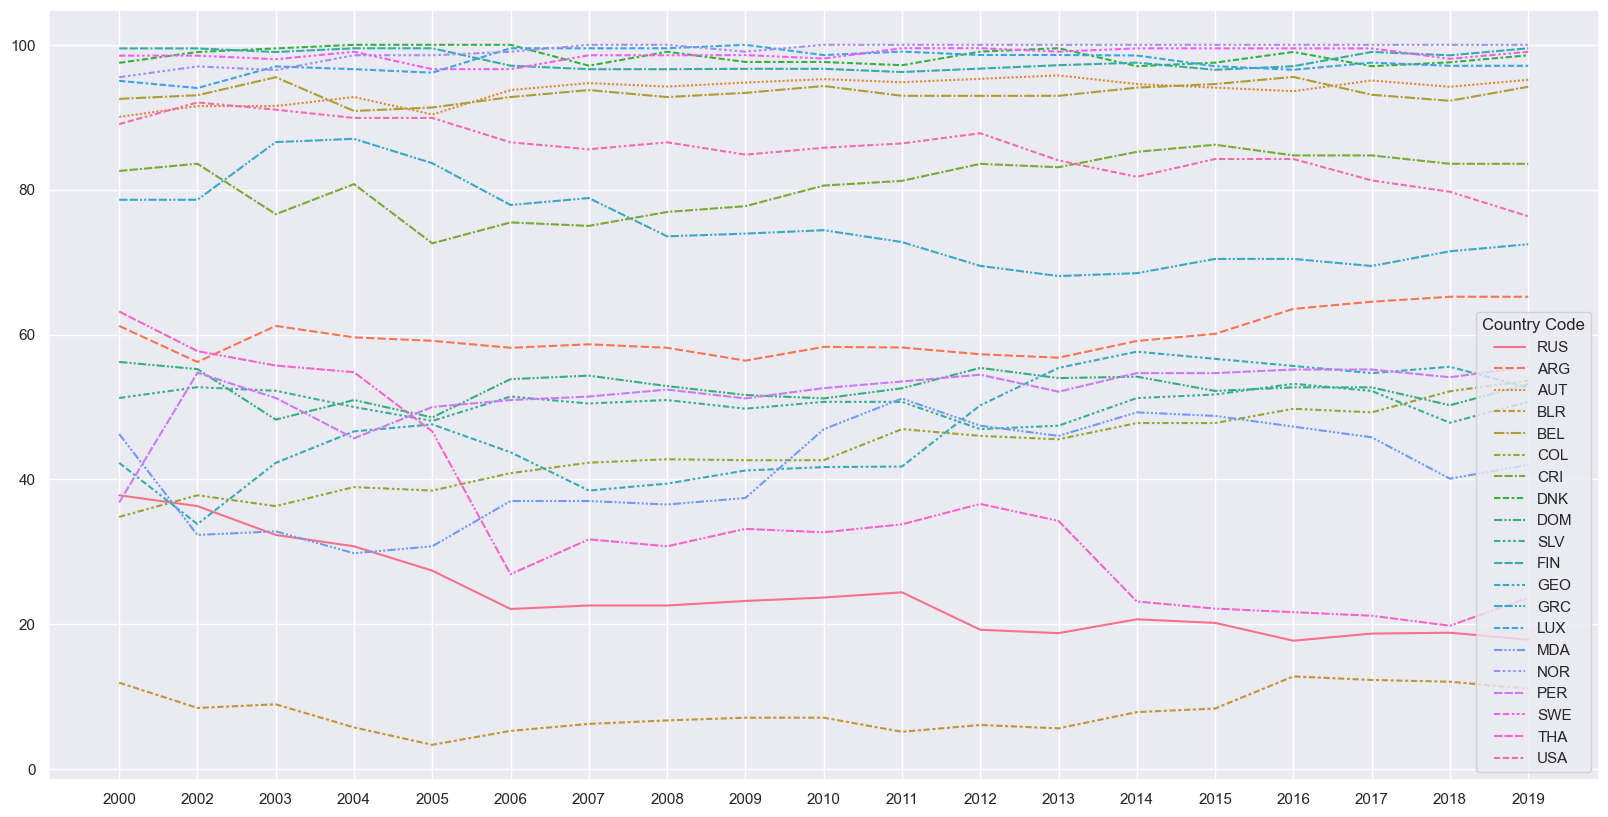

In [56]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df.transpose()).set_xticklabels([year[0:4] for year in df.columns.to_list()])
plt.show()

That dataset has no 1 column so we will just fill this with average value

9. Save in the most comfortable way